<a href="https://colab.research.google.com/github/manas3858/Club-Mahindra-DataOlympics/blob/master/Club_Mahindra_DataOlympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # [Contest Link](https://datahack.analyticsvidhya.com/contest/club-mahindra-dataolympics/)

![mahindra](https://datahack.analyticsvidhya.com/media/__sized__/contest_cover/Hackathon-Banner-2_bmWi9f1-thumbnail-1200x1200-90.jpg)

**Problem Statement**

Food & Beverages Spend Prediction in Club Mahindra Resorts
Club Mahindra (Club M) makes significant revenue from Food and Beverages (F&B) sales in their resorts. The members of Club M are offered a wide variety of items in either buffet or À la carte form. Following are some benefits that the model to predict the spend by a member in their next visit to a resort will bring:
1. Predicting the F&B spend of a member in a resort would help in improving the pre-sales during resort booking through web and mobile app
2. Targeted campaigns to suit the member taste and preference of F&B
3. Providing members in the resort with a customized experience and offers
4. Help resort kitchen to plan the inventory and food quantity to be prepared in advance

Given the information related to resort, club member, reservation etc. the task is to predict average spend per room night on food and beverages for the each reservation in the test set.




# Data Import

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1iRfPEI6T7EMpokoctBVy7blT_JV18jBj' # The shareable link

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv') 

1iRfPEI6T7EMpokoctBVy7blT_JV18jBj


In [0]:
link = 'https://drive.google.com/open?id=1Ll6B5GhzADgIhB0J6JWtGK9NPvfOZiYI' # The shareable link

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test.csv') 

1Ll6B5GhzADgIhB0J6JWtGK9NPvfOZiYI


In [0]:
import os
os.listdir('/content/')

['.config',
 'adc.json',
 'lgbm_train.csv',
 'final_lgbm.csv',
 'final_lasso.csv',
 'lgbm_test.csv',
 'catboost_info',
 'test.csv',
 'train.csv',
 'final.csv',
 'sample_data']

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
##train = pd.read_csv('/content/train.csv', parse_dates = ['booking_date','checkin_date','checkout_date']) -- Improper Date format
train = pd.read_csv('/content/train.csv')
train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [0]:
train.dtypes

reservation_id                         object
booking_date                           object
checkin_date                           object
checkout_date                          object
channel_code                            int64
main_product_code                       int64
numberofadults                          int64
numberofchildren                        int64
persontravellingid                      int64
resort_region_code                      int64
resort_type_code                        int64
room_type_booked_code                   int64
roomnights                              int64
season_holidayed_code                 float64
state_code_residence                  float64
state_code_resort                       int64
total_pax                               int64
member_age_buckets                     object
booking_type_code                       int64
memberid                               object
cluster_code                           object
reservationstatusid_code          

In [0]:
train['booking_date'] = pd.to_datetime(train['booking_date'],format= '%d/%m/%y')                    

In [0]:
train['checkin_date'] = pd.to_datetime(train['checkin_date'],format= '%d/%m/%y') 
train['checkout_date'] = pd.to_datetime(train['checkout_date'],format= '%d/%m/%y')   

In [0]:
test = pd.read_csv('/content/test.csv')
test['booking_date'] = pd.to_datetime(test['booking_date'],format= '%d/%m/%y')   
test['checkin_date'] = pd.to_datetime(test['checkin_date'],format= '%d/%m/%y')   
test['checkout_date'] = pd.to_datetime(test['checkout_date'],format= '%d/%m/%y')   

In [0]:
train.booking_date.describe()

count                  341424
unique                   1621
top       2016-09-02 00:00:00
freq                     1353
first     2014-09-03 00:00:00
last      2019-03-01 00:00:00
Name: booking_date, dtype: object

In [0]:
train.isnull().sum()

reservation_id                           0
booking_date                             0
checkin_date                             0
checkout_date                            0
channel_code                             0
main_product_code                        0
numberofadults                           0
numberofchildren                         0
persontravellingid                       0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
roomnights                               0
season_holidayed_code                  114
state_code_residence                  4764
state_code_resort                        0
total_pax                                0
member_age_buckets                       0
booking_type_code                        0
memberid                                 0
cluster_code                             0
reservationstatusid_code                 0
resort_id                                0
amount_spen

In [0]:
test.isnull().sum()

reservation_id                 0
booking_date                   0
checkin_date                   0
checkout_date                  0
channel_code                   0
main_product_code              0
numberofadults                 0
numberofchildren               0
persontravellingid             0
resort_region_code             0
resort_type_code               0
room_type_booked_code          0
roomnights                     0
season_holidayed_code         35
state_code_residence        2260
state_code_resort              0
total_pax                      0
member_age_buckets             0
booking_type_code              0
memberid                       0
cluster_code                   0
reservationstatusid_code       0
resort_id                      0
dtype: int64


# **Missing Value Treatment and EDA**

In [0]:
# cannot get anything from member IDs
set(train[train.state_code_residence.isnull()].memberid.unique()).intersection(set(train[train.state_code_residence.notnull()].memberid.unique()))

set()

In [0]:
# cannot get anything from persontravelling IDs
set(train[train.state_code_residence.isnull()].persontravellingid.unique()).intersection(set(train[train.persontravellingid.notnull()].memberid.unique()))

set()

In [0]:
train.state_code_residence.value_counts()

8.0     134919
2.0      41143
1.0      28040
7.0      25873
5.0      21051
4.0      15938
9.0      12291
15.0      9490
10.0      9356
6.0       6384
12.0      6092
3.0       3943
23.0      3835
14.0      3132
16.0      2371
13.0      1771
21.0      1694
20.0      1470
18.0      1429
19.0      1085
26.0      1068
25.0       840
27.0       790
11.0       713
28.0       541
22.0       432
24.0       382
30.0       144
29.0       101
33.0        88
31.0        60
37.0        59
32.0        53
34.0        48
35.0        16
36.0        12
38.0         6
Name: state_code_residence, dtype: int64

In [0]:
## No inference from any variable, replacing nulls with mod of the distribution
train['state_code_residence'].fillna(8, inplace = True)

In [0]:
test['state_code_residence'].fillna(8, inplace = True)

In [0]:
train.season_holidayed_code.value_counts()

2.0    126771
3.0    118187
4.0     69387
1.0     26965
Name: season_holidayed_code, dtype: int64

In [0]:
test.season_holidayed_code.value_counts()

2.0    54093
3.0    51453
4.0    29889
1.0    11295
Name: season_holidayed_code, dtype: int64

In [0]:
## very few nulls for season_holidayed_code, replacing NAs with mod
train['season_holidayed_code'].fillna(2, inplace = True)
test['season_holidayed_code'].fillna(2, inplace = True)

In [0]:
train.isnull().sum()

reservation_id                        0
booking_date                          0
checkin_date                          0
checkout_date                         0
channel_code                          0
main_product_code                     0
numberofadults                        0
numberofchildren                      0
persontravellingid                    0
resort_region_code                    0
resort_type_code                      0
room_type_booked_code                 0
roomnights                            0
season_holidayed_code                 0
state_code_residence                  0
state_code_resort                     0
total_pax                             0
member_age_buckets                    0
booking_type_code                     0
memberid                              0
cluster_code                          0
reservationstatusid_code              0
resort_id                             0
amount_spent_per_room_night_scaled    0
dtype: int64

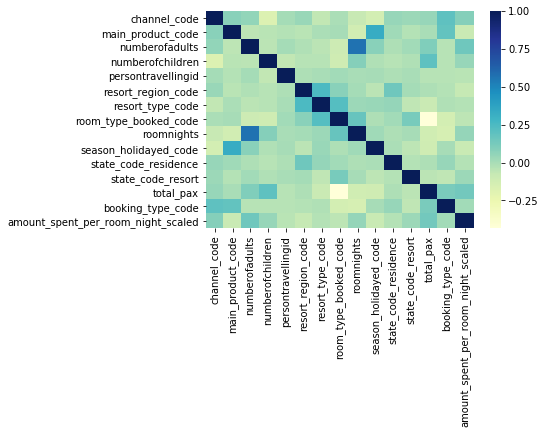

In [0]:
import seaborn as sns

sns.heatmap(train.corr(),cmap = "YlGnBu")

In [0]:
# 1 way ANOVA test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [0]:
# Create a SelectKBest object to select features with K best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k = 4)

In [0]:
categ_column = ['channel_code','main_product_code','persontravellingid','resort_region_code','resort_type_code','room_type_booked_code','season_holidayed_code','state_code_residence','state_code_resort','booking_type_code']

In [0]:
train[categ_column].head()

,channel_code,main_product_code,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,season_holidayed_code,state_code_residence,state_code_resort,booking_type_code
0,3,1,46,3,3,3,2.0,7.0,3,1
1,1,1,46,3,3,4,2.0,7.0,5,1
2,1,1,47,1,5,4,2.0,7.0,1,1
3,1,1,46,2,2,3,2.0,7.0,2,1
4,1,1,46,2,2,4,2.0,7.0,2,1


In [0]:
# Get f values for each of the variables
fvalues = fvalue_selector.fit(train[categ_column],train.iloc[:,23])

In [0]:
print("p_values", fvalue_selector.pvalues_)

p_values [2.35013336e-113 9.98282886e-001 1.00000000e+000 0.00000000e+000
 1.71419093e-121 7.96976144e-050 2.38073033e-079 1.00000000e+000
 5.59404873e-265 9.86698452e-001]


In [0]:
print("f_scores", fvalue_selector.scores_)

f_scores [1.15354885 0.98198903 0.81824383 1.52865897 1.15958776 1.09749566
 1.12602574 0.94479866 1.24802967 0.98631687]


In [0]:
amount_spend_book_date = (train.groupby('booking_date').sum()['amount_spent_per_room_night_scaled'].reset_index())

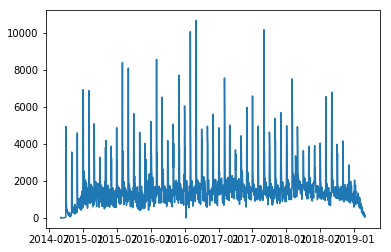

In [0]:
plt.plot(amount_spend_book_date.iloc[:,0],amount_spend_book_date.iloc[:,1])
plt.show()

# Feature Engineering

In [0]:
#total pax in train data seems incorrect, calculating total_pax separately
train['total_visitors'] = train['numberofadults'] + train['numberofchildren'] 

In [0]:
# Any kids in the group?
train['children_yn'] = train['numberofchildren'] > 0

In [0]:
# Advance booking period
train['advance_book_period'] = (train['checkin_date'] - train['booking_date']).dt.days

In [0]:
# Advance booking period
train['stay_period'] = (train['checkout_date'] - train['checkin_date']).dt.days

In [0]:
# Booking Month and Check in Month
train['checkin_month'] = train['checkin_date'].dt.month.astype('str')
train['booking_month'] = train['booking_date'].dt.month.astype('str')

In [0]:
# Checkin week number and weekday 
train['checkin_weekday'] = train['checkin_date'].dt.weekday.astype('str')
train['checkin_weeknumber'] = train['checkin_date'].dt.week.astype('str')

In [0]:
# Booking week number and weekday 
train['booking_weekday'] = train['booking_date'].dt.weekday.astype('str')
train['booking_weeknumber'] = train['booking_date'].dt.week.astype('str')

In [0]:
# Analysig No of adults
train['numberofadults'].value_counts()

2     149414
4      84468
3      63247
6      20052
5       9849
8       5198
7       2673
9       1445
1       1280
10      1256
12      1010
11       357
16       293
14       216
15       207
13       120
24        83
20        64
18        62
0         27
17        20
22        19
19        12
25        12
21        11
23        10
32        10
30         9
Name: numberofadults, dtype: int64

In [0]:
# Bucketing no of adults in 0-8, 9-16, 17+
bins = pd.IntervalIndex.from_tuples([(-1, 8), (8, 16), (16, 33)])

In [0]:
train['numberofadults_bins'] = pd.cut(train['numberofadults'],bins)

In [0]:
train['numberofadults_bins'].value_counts()

(-1, 8]     336208
(8, 16]       4904
(16, 33]       312
Name: numberofadults_bins, dtype: int64

In [0]:
train['numberofadults_bins'].isnull().sum()

0

In [0]:
# Analysing stay days
train['stay_period'].value_counts()

2     119723
3     109726
1      64829
4      33347
5       9509
6       2655
7       1424
8        124
9         41
10        27
12         5
11         5
14         4
13         3
26         1
21         1
Name: stay_period, dtype: int64

In [0]:
# Bucketing stay days in 1-4, 5-8, 8+
bins_stayperiod = pd.IntervalIndex.from_tuples([(0,4),(4,8),(8,26)])
train['stay_period_bins'] = pd.cut(train['stay_period'],bins_stayperiod)

In [0]:
train['stay_period_bins'].value_counts()

(0, 4]     327625
(4, 8]      13712
(8, 26]        87
Name: stay_period_bins, dtype: int64

In [0]:
train['stay_period_bins'].isnull().sum()

0

In [0]:
# Analysing roomnight
train['roomnights'].value_counts()

 3     94256
 2     85105
 4     58487
 6     36932
 1     25777
 5     12303
 8     10716
 9      5107
 12     3546
 10     2912
 7      2883
 15      805
 16      592
 14      496
 11      322
 18      312
 20      215
 13      119
 21       93
 24       89
 17       59
 30       57
 28       50
 27       27
 19       27
 23       19
 22       15
 25       15
 36       12
 31       12
 26       11
 32        9
 35        8
 47        6
 29        5
 34        5
 37        5
 39        5
 42        4
 33        2
-45        1
 60        1
 41        1
 0         1
Name: roomnights, dtype: int64

In [0]:
# -45 in the data is incorrect
train.loc[train['roomnights'] <0, 'roomnights'] = 7

In [0]:
# Bucketing roomnights in 0-6, 7-12, 12+
bins_roomnights = pd.IntervalIndex.from_tuples([(-1,6),(6,12),(12,100)])
train['roomnights_bins'] = pd.cut(train['roomnights'],bins_roomnights)

In [0]:
train['roomnights_bins'].value_counts()

(-1, 6]      312861
(6, 12]       25487
(12, 100]      3076
Name: roomnights_bins, dtype: int64

In [0]:
train['roomnights_bins'].isnull().sum()

0

In [0]:
train['roomnights_bins'] = train['roomnights_bins'].astype('str')
train['stay_period_bins'] = train['stay_period_bins'].astype('str')
train['numberofadults_bins'] = train['numberofadults_bins'].astype('str')

Extracting features from memberids features

In [0]:
# Are memberids in test and train the same? -- No overlap
set(train.memberid.unique()).intersection(set(test.memberid.unique()))

set()

In [0]:
# unique member_ids
train.memberid.nunique()

101327

In [0]:
# total records
train.shape[0]

341424

In [0]:
# No of bookings per memberid
member_booking = train.groupby(by = 'memberid').count()['reservation_id'].reset_index()

In [0]:
type(member_booking)

pandas.core.frame.DataFrame

In [0]:
member_booking.columns = ['member_id', 'no_of_bookings']

In [0]:
member_booking.head()

,member_id,no_of_bookings
0,00005d44634de09d36aaa5ccb20b67223ec9406c532335...,4
1,0000a957d528a2df1dc9ed2314bc009e8666e75a2d6c23...,2
2,00016b96386f53adf2ea4beee032a8793e66e6ddd0ed28...,2
3,00021328914515303c6992143d1f0bedaf1564dc607b72...,1
4,000218e18abc5d2e73212e064983cd4433f7969fd908a6...,4


In [0]:
train = pd.merge(train,
                 member_booking[['member_id','no_of_bookings']],
                 left_on = 'memberid',
                 right_on = 'member_id',
                 how = 'left'
                 )

In [0]:
train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,booking_month,checkin_weekday,checkin_weeknumber,booking_weekday,booking_weeknumber,numberofadults_bins,stay_period_bins,roomnights_bins,member_id,no_of_bookings
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,3,...,4,3,14,3,14,"(-1, 8]","(0, 4]","(-1, 6]",3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,14
1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,3,...,1,5,15,4,4,"(-1, 8]","(4, 8]","(-1, 6]",3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,14
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,1,...,1,6,5,2,5,"(-1, 8]","(0, 4]","(-1, 6]",3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,14
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,2,...,5,3,24,5,18,"(-1, 8]","(4, 8]","(-1, 6]",3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,14
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,2,...,9,0,51,2,36,"(-1, 8]","(4, 8]","(-1, 6]",3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,14


In [0]:
train.drop(columns = ['member_id'], axis = 1, inplace =True)

In [0]:
# Average length of stay
member_avg_stay = train.groupby('memberid').mean()['stay_period'].reset_index()

In [0]:
member_avg_stay.columns = ['memberid','member_avg_stay_period']

In [0]:
member_avg_stay.head()

,memberid,member_avg_stay_period
0,00005d44634de09d36aaa5ccb20b67223ec9406c532335...,2.50
1,0000a957d528a2df1dc9ed2314bc009e8666e75a2d6c23...,3.00
2,00016b96386f53adf2ea4beee032a8793e66e6ddd0ed28...,3.00
3,00021328914515303c6992143d1f0bedaf1564dc607b72...,2.00
4,000218e18abc5d2e73212e064983cd4433f7969fd908a6...,2.25


In [0]:
train = pd.merge(train,
                member_avg_stay[['memberid','member_avg_stay_period']],
                on = 'memberid',
                how = 'left'
                )

In [0]:
# Total length of stay
member_tot_stay = train.groupby('memberid').sum()['stay_period'].reset_index()
member_tot_stay.columns = ['memberid','member_tot_stay']
train = pd.merge(train,
                member_tot_stay[['memberid','member_tot_stay']],
                on = 'memberid',
                how = 'left'
                )

In [0]:
# Average no of travellers
member_avg_trvlr = train.groupby('memberid').mean()['total_visitors'].reset_index()
member_avg_trvlr.columns = ['memberid','member_avg_trvlr']
train = pd.merge(train,
                member_avg_trvlr[['memberid','member_avg_trvlr']],
                on = 'memberid',
                how = 'left'
                )

In [0]:
# Total no of travellers
member_tot_trvlr = train.groupby('memberid').sum()['total_visitors'].reset_index()
member_tot_trvlr.columns = ['memberid','member_tot_trvlr']
train = pd.merge(train,
                member_tot_trvlr[['memberid','member_tot_trvlr']],
                on = 'memberid',
                how = 'left'
                )

In [0]:
train.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'total_visitors', 'children_yn',
       'advance_book_period', 'stay_period', 'checkin_month', 'booking_month',
       'checkin_weekday', 'checkin_weeknumber', 'booking_weekday',
       'booking_weeknumber', 'numberofadults_bins', 'stay_period_bins',
       'roomnights_bins', 'no_of_bookings', 'member_avg_stay_period',
       'member_tot_stay', 'member_avg_trvlr', 'member_tot_trvlr'],
      dtype='object')

In [0]:
train.dtypes

reservation_id                                object
booking_date                          datetime64[ns]
checkin_date                          datetime64[ns]
checkout_date                         datetime64[ns]
channel_code                                   int64
main_product_code                              int64
numberofadults                                 int64
numberofchildren                               int64
persontravellingid                             int64
resort_region_code                             int64
resort_type_code                               int64
room_type_booked_code                          int64
roomnights                                     int64
season_holidayed_code                        float64
state_code_residence                         float64
state_code_resort                              int64
total_pax                                      int64
member_age_buckets                            object
booking_type_code                             

In [0]:
# Updating test data
test['total_visitors'] = test['numberofadults'] + test['numberofchildren']
test['children_yn'] = test['numberofchildren'] > 0
test['advance_book_period'] = (test['checkin_date'] - test['booking_date']).dt.days
test['stay_period'] = (test['checkout_date'] - test['checkin_date']).dt.days
test['checkin_month'] = test['checkin_date'].dt.month.astype('str')
test['booking_month'] = test['booking_date'].dt.month.astype('str')
test['checkin_weekday'] = test['checkin_date'].dt.weekday.astype('str')
test['checkin_weeknumber'] = test['checkin_date'].dt.week.astype('str')
test['booking_weekday'] = test['booking_date'].dt.weekday.astype('str')
test['booking_weeknumber'] = test['booking_date'].dt.week.astype('str')
test['numberofadults_bins'] = pd.cut(test['numberofadults'],bins)
test['stay_period_bins'] = pd.cut(test['stay_period'],bins_stayperiod)
test['roomnights_bins'] = pd.cut(test['roomnights'],bins_roomnights)
test['roomnights_bins'] = test['roomnights_bins'].astype('str')
test['stay_period_bins'] = test['stay_period_bins'].astype('str')
test['numberofadults_bins'] = test['numberofadults_bins'].astype('str')

member_booking = test.groupby(by = 'memberid').count()['reservation_id'].reset_index()
member_booking.columns = ['memberid', 'no_of_bookings']
test = pd.merge(test,
                 member_booking[['memberid','no_of_bookings']],
                 on = 'memberid',
                 how = 'left'
                 )
				 
member_avg_stay = test.groupby('memberid').mean()['stay_period'].reset_index()
member_avg_stay.columns = ['memberid','member_avg_stay_period']
test = pd.merge(test,
                member_avg_stay[['memberid','member_avg_stay_period']],
                on = 'memberid',
                how = 'left'
                )

# Total length of stay
member_tot_stay = test.groupby('memberid').sum()['stay_period'].reset_index()
member_tot_stay.columns = ['memberid','member_tot_stay']
test = pd.merge(test,
                member_tot_stay[['memberid','member_tot_stay']],
                on = 'memberid',
                how = 'left'
                )
				
# Average no of travellers
member_avg_trvlr = test.groupby('memberid').mean()['total_visitors'].reset_index()
member_avg_trvlr.columns = ['memberid','member_avg_trvlr']
test = pd.merge(test,
                member_avg_trvlr[['memberid','member_avg_trvlr']],
                on = 'memberid',
                how = 'left'
                )
				
# Total no of travellers
member_tot_trvlr = test.groupby('memberid').sum()['total_visitors'].reset_index()
member_tot_trvlr.columns = ['memberid','member_tot_trvlr']
test = pd.merge(test,
                member_tot_trvlr[['memberid','member_tot_trvlr']],
                on = 'memberid',
                how = 'left'
                )

# **Model**

**CatBoost**

In [0]:
X= train.copy()
y = train.iloc[:,23]

In [0]:
train.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'total_visitors', 'children_yn',
       'advance_book_period', 'stay_period', 'checkin_month', 'booking_month',
       'checkin_weekday', 'checkin_weeknumber', 'booking_weekday',
       'booking_weeknumber', 'numberofadults_bins', 'stay_period_bins',
       'roomnights_bins', 'no_of_bookings', 'member_avg_stay_period',
       'member_tot_stay', 'member_avg_trvlr', 'member_tot_trvlr'],
      dtype='object')

In [0]:
X.drop(columns = ['reservation_id','amount_spent_per_room_night_scaled', 'booking_date', 'checkin_date', 'checkout_date','memberid'], axis = 1 , inplace = True)

In [0]:
from sklearn.model_selection import train_test_split 
x_train, x_val , y_train, y_val = train_test_split(X,y,test_size=0.20)

In [0]:
X.columns

Index(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id', 'total_visitors',
       'children_yn', 'advance_book_period', 'stay_period', 'checkin_month',
       'booking_month', 'checkin_weekday', 'checkin_weeknumber',
       'booking_weekday', 'booking_weeknumber', 'numberofadults_bins',
       'stay_period_bins', 'roomnights_bins', 'no_of_bookings',
       'member_avg_stay_period', 'member_tot_stay', 'member_avg_trvlr',
       'member_tot_trvlr'],
      dtype='object')

In [0]:
categ_column = ['channel_code','main_product_code','persontravellingid','resort_region_code',
                'resort_type_code','room_type_booked_code','season_holidayed_code','state_code_residence',
                'state_code_resort','member_age_buckets','booking_type_code','cluster_code',
                'reservationstatusid_code','resort_id','children_yn',
                'checkin_month','booking_month', 'checkin_weekday', 'checkin_weeknumber', 'booking_weekday', 'booking_weeknumber', 
                'numberofadults_bins','stay_period_bins', 'roomnights_bins'
               ]

In [0]:
!pip install catboost


import catboost
from catboost import Pool, CatBoostRegressor,cv

In [0]:
_train = Pool(x_train, label=y_train,cat_features= categ_column)
_valid = Pool(x_val, label=y_val,cat_features= categ_column)

In [0]:
model = CatBoostRegressor(subsample=0.8,
                           l2_leaf_reg = 2,
                           max_depth=8,
                           loss_function="RMSE",
                           learning_rate=0.02,
                           iterations=50000,
                           bootstrap_type='Bernoulli',
                           task_type="GPU"
                         )

In [0]:
fit_model = model.fit(_train,verbose_eval=1000, early_stopping_rounds=100,eval_set=[_valid],use_best_model=True,plot=False)

5000:	learn: 0.9219402	test: 0.9798397	best: 0.9798345 (4997)	total: 6m 13s	remaining: 55m 58s
bestTest = 0.9796671037
bestIteration = 5504
Shrink model to first 5505 iterations.
0:	learn: 7.6434674	test: 7.6484862	best: 7.6484862 (0)	total: 133ms	remaining: 1h 51m 14s
1000:	learn: 0.9674327	test: 0.9754753	best: 0.9754753 (1000)	total: 1m 19s	remaining: 1h 4m 44s
2000:	learn: 0.9547053	test: 0.9733821	best: 0.9733797 (1999)	total: 2m 32s	remaining: 1h 1m 2s
3000:	learn: 0.9438415	test: 0.9723342	best: 0.9723291 (2996)	total: 3m 44s	remaining: 58m 41s
4000:	learn: 0.9337315	test: 0.9716448	best: 0.9716448 (3999)	total: 4m 57s	remaining: 57m 1s
5000:	learn: 0.9238884	test: 0.9712900	best: 0.9712895 (4999)	total: 6m 8s	remaining: 55m 19s
bestTest = 0.9709854834
bestIteration = 5726
Shrink model to first 5727 iterations.


In [0]:
important_features = pd.DataFrame.from_dict({'Columns':fit_model.feature_names_,'Value':fit_model.feature_importances_})
important_features = important_features.sort_values(by = 'Value', ascending = False)


In [0]:
print(important_features)

                     Columns      Value
21               stay_period  13.229584
8                 roomnights   6.545107
17                 resort_id   6.142688
12                 total_pax   4.783518
4         persontravellingid   4.530732
10      state_code_residence   4.504762
34          member_avg_trvlr   3.894647
20       advance_book_period   3.512578
18            total_visitors   3.305636
25        checkin_weeknumber   3.188466
27        booking_weeknumber   2.992625
1          main_product_code   2.989326
35          member_tot_trvlr   2.898595
13        member_age_buckets   2.896722
32    member_avg_stay_period   2.886465
2             numberofadults   2.479731
11         state_code_resort   2.396691
22             checkin_month   2.086608
7      room_type_booked_code   1.931677
33           member_tot_stay   1.920948
24           checkin_weekday   1.913532
23             booking_month   1.835198
15              cluster_code   1.804850
0               channel_code   1.800224


In [0]:
x_test= test.copy()
x_test.drop(columns = ['reservation_id', 'booking_date', 'checkin_date', 'checkout_date','memberid'], axis = 1 , inplace = True)

In [0]:
y_pred = fit_model.predict(x_test)
final_catboost = pd.DataFrame(y_pred)
final_catboost.to_csv('final_catboost.csv')

In [0]:
# from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
# y_train_pred = fit_model.predict(X)
# r2_score(y_train_pred, y)

**Light GBM**

In [0]:
import lightgbm as lgb

In [0]:
#data
lgbm_train_X = pd.get_dummies(X)
lgbm_test = pd.get_dummies(x_test)

In [0]:
# Only one record is there with reservationstatusid_cod = D, dropping that
lgbm_train_X.drop(columns = ['reservationstatusid_code_D'], axis = 1, inplace = True)

In [0]:
lgbm_train_X.shape

(341424, 227)

In [0]:
lgbm_test.shape

(146765, 227)

In [0]:
lgbm_categ_column = ['channel_code','main_product_code','persontravellingid','resort_region_code',
                    'resort_type_code','room_type_booked_code','season_holidayed_code','state_code_residence',
                    'state_code_resort','booking_type_code','children_yn'
                    ]

In [0]:
x_train,x_test,y_train,y_test = train_test_split(lgbm_train_X,y, test_size = 0.2, random_state = 42)

In [0]:
lgbm_model = {
    "objective" : "regression",
    "metric" : "rmse",
    "boosting": 'gbdt',
    "max_depth" : 8,
    "sub_sample":0.8,
    "num_leaves" : 31,
    "learning_rate" : 0.01,
    "seed": 42}

In [0]:
trn_data = lgb.Dataset(x_train, label=y_train,categorical_feature= lgbm_categ_column)
val_data = lgb.Dataset(x_test, label=y_test,categorical_feature= lgbm_categ_column)

In [0]:
fit_lgbm = lgb.train(lgbm_model, trn_data, num_boost_round= 20000, valid_sets = [trn_data, val_data], verbose_eval=500, 
                early_stopping_rounds = 100)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[500]	training's rmse: 0.980738	valid_1's rmse: 0.984825
[1000]	training's rmse: 0.970274	valid_1's rmse: 0.979501
[1500]	training's rmse: 0.964217	valid_1's rmse: 0.978194
[2000]	training's rmse: 0.95963	valid_1's rmse: 0.977708
[2500]	training's rmse: 0.955539	valid_1's rmse: 0.977468
[3000]	training's rmse: 0.951657	valid_1's rmse: 0.977355
[3500]	training's rmse: 0.947912	valid_1's rmse: 0.977156
[4000]	training's rmse: 0.944261	valid_1's rmse: 0.977047
[4500]	training's rmse: 0.940668	valid_1's rmse: 0.97698
Early stopping, best iteration is:
[4632]	training's rmse: 0.939713	valid_1's rmse: 0.976958


In [0]:
pred_lgbm = fit_lgbm.predict(lgbm_test, num_iteration=fit_lgbm.best_iteration)

In [0]:
final_lgbm = pd.DataFrame(pred_lgbm)
final_lgbm.to_csv('final_lgbm.csv')

**Lasso Regression**

In [0]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [0]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model,lgbm_train_X).values,y, scoring="neg_mean_squared_error", cv = kf)
    return(rmse)

In [0]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [0]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [0]:
lasso.fit(lgbm_train_X, y)
lasso_train_pred = lasso.predict(lgbm_train_X.values)
lasso_pred = lasso.predict(lgbm_test.values)
print(rmsle(y, lasso_train_pred))

1.0005034334699987


In [0]:
final_lasso = pd.DataFrame(lasso_pred)
final_lasso.to_csv('final_lasso.csv')

**Weighted Average of Predictions**

In [0]:
final_averaged = (0.7*final_catboost + 0.25*final_lgbm + 0.05*final_lasso)

In [0]:
final_averaged.head()

,0
0,8.072526
1,7.329073
2,7.589546
3,7.836493
4,7.711675


In [0]:
final_averaged.to_csv('final_averaged.csv')

Weighted Average gave RMSE of	0.9732 in private leaderboard

#**Private LB Rank : 92/983**

#**Public LB Rank : 80/983**